In [1]:
import numpy as np
import aocd
import re

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from PIL import Image 
%matplotlib inline

def get_as_ints(l):
    return list(map(lambda x: int(x), l))

def get_lines(day):
    return aocd.get_data(year=2021, day=day).split("\n")

def get_csv(day):
    return aocd.get_data(year=2021, day=day).split(",")
                
def get_lines_as_ints(day):
    return get_as_ints(get_lines(day))

def get_csv_as_ints(day):
    return get_as_ints(get_csv(day))

def get_csv_lines(day):
    return list(map(lambda s: s.split(","), get_as_lines(day)))

def get_csv_lines_as_ints(day):
    return list(map(lambda s: get_as_ints(s.split(",")), get_as_lines(day)))

In [2]:
# Day 1: part 1

data = get_lines_as_ints(1)

larger = 0
for i in range(len(data) - 1):
    if data[i] < data[i + 1]:
        larger += 1
        
print(larger)

1521


In [3]:
# Day 1: part 2

data = get_lines_as_ints(1)

larger = 0
for i in range(len(data) - 3):
    if data[i] < data[i + 3]:
        larger += 1
        
print(larger)

1543


In [4]:
# Day 2: part 1

data = get_lines(2)

depth = 0
forward = 0

for datum in data:
    instruction = datum.split(" ")
    val = int(instruction[1])
    if instruction[0] == "forward":
        forward += val
    elif instruction[0] == "up":
        depth -= val
    else:
        depth += val

print(forward * depth)

1654760


In [5]:
# Day 2: part 2

data = get_lines(2)

depth = 0
forward = 0
aim = 0

for datum in data:
    instruction = datum.split(" ")
    val = int(instruction[1])
    if instruction[0] == "forward":
        forward += val
        depth += aim * val
    elif instruction[0] == "up":
        aim -= val
    else:
        aim += val

print(forward * depth)

1956047400


In [6]:
# Day 3: part 1

data = get_lines(3)

new_data = np.zeros((len(data), len(data[0])))

counter = 0
for datum in data:
    for bit in datum:
        new_data[counter // len(data[0])][counter % len(data[0])] += int(bit)
        counter += 1

one_is_max = np.sum(new_data, axis = 0) > (len(new_data) / 2)

num_one = 0
num_two = 0

for i in range(len(data[0])):
    num_one += pow(2, i) * one_is_max[len(data[0]) - i - 1]
    num_two += pow(2, i) * (1 - one_is_max[len(data[0]) - i - 1])
    
print(int(num_one * num_two))

2954600


In [7]:
# Day 3: part 2

data = get_lines(3)

new_data = np.zeros((len(data), len(data[0])))

counter = 0
for datum in data:
    for bit in datum:
        new_data[counter // len(data[0])][counter % len(data[0])] += int(bit)
        counter += 1

        
oxygen = np.copy(new_data)
co2 = np.copy(new_data)
index = 0
while len(oxygen) > 1 and index < len(data[0]):
    one_is_max = np.sum(oxygen, axis = 0)[index] >= (len(oxygen) / 2)
    oxygen = oxygen[oxygen[:, index] == (1 if one_is_max else 0)]
    index += 1

index = 0
while len(co2) > 1 and index < len(data[0]):
    one_is_max = np.sum(co2, axis = 0)[index] >= (len(co2) / 2)
    co2 = co2[co2[:, index] == (0 if one_is_max else 1)]
    index += 1

num_one = 0
num_two = 0

for i in range(len(data[0])):
    num_one += pow(2, i) * oxygen[0][len(data[0]) - i - 1]
    num_two += pow(2, i) * (co2[0][len(data[0]) - i - 1])
    
print(int(num_one * num_two))

1662846


In [8]:
# Day 4: Part 1

data = get_lines(4)
numbers = data[0].split(",")

boards = np.zeros(((len(data) - 1) // 6, 5, 5))
selected = np.copy(boards)

for i in range(2, len(data)):
    if len(data[i]) < 10:
        continue
    else:
        j = 0
        for num in re.split("\\s+", data[i].strip()):
            boards[(i - 2) // 6, (i - 2) % 6, j] = int(num)
            j+=1
            
for number in numbers:
    number = int(number)
    selected[boards[:,:,:] == number] = 1
    
    rows = np.logical_or.reduce(np.sum(selected, 2)[:, :] == 5, axis = 1)
    cols = np.logical_or.reduce(np.sum(selected, 1)[:, :] == 5, axis = 1)
    
    row = np.logical_or.reduce(rows)
    col = np.logical_or.reduce(cols)
    
    if row:
        print(int(np.sum(boards[rows][selected[rows] == False]) * number))
        break
    if col:
        print(int(np.sum(boards[cols][selected[cols] == False]) * number))
        break

49860


In [9]:
# Day 4: Part 2

data = get_lines(4)
numbers = data[0].split(",")

boards = np.zeros(((len(data) - 1) // 6, 5, 5))
selected = np.copy(boards)

for i in range(2, len(data)):
    if len(data[i]) < 10:
        continue
    else:
        j = 0
        for num in re.split("\\s+", data[i].strip()):
            boards[(i - 2) // 6, (i - 2) % 6, j] = int(num)
            j+=1

found = False
index = -1
for number in numbers:
    number = int(number)
    selected[boards[:,:,:] == number] = 1
    
    rows = np.logical_or.reduce(np.sum(selected, 2)[:, :] == 5, axis = 1)
    cols = np.logical_or.reduce(np.sum(selected, 1)[:, :] == 5, axis = 1)
    
    solved = np.logical_or(rows, cols)
    
    if len(solved[solved == False]) == 1:
        found = True
        index = solved == False
        
    if found and len(solved[solved == False]) == 0:
        print(int(np.sum(boards[index][selected[index] == 0]) * number))
        break

24628


In [10]:
# Day 5: Part 1

data = get_lines(5)

new_data = np.zeros((len(data), 2, 2))

for i in range(len(data)):
    d = data[i].split(" -> ")
    d = list(map(lambda x: x.split(","), d))
    new_data[i] = [[int(d[0][0]), int(d[0][1])], [int(d[1][0]), int(d[1][1])]]
    
grid = np.zeros((1000,1000))

for line in new_data:
    if line[0][0] == line[1][0]:
        start = int(min(line[0][1], line[1][1]))
        end = int(max(line[0][1], line[1][1]))
        for j in range(start, end + 1): 
            grid[int(line[0][0]), int(j)] += 1
            
    elif line[0][1] == line[1][1]:
        start = int(min(line[0][0], line[1][0]))
        end = int(max(line[0][0], line[1][0]))
        for j in range(start, end + 1): 
            grid[int(j), int(line[0][1])] += 1
            
print(len(grid[grid >= 2]))

7297


In [11]:
# Day 5: Part 2

data = get_lines(5)

new_data = np.zeros((len(data), 2, 2))

for i in range(len(data)):
    d = data[i].split(" -> ")
    d = list(map(lambda x: x.split(","), d))
    new_data[i] = [[int(d[0][0]), int(d[0][1])], [int(d[1][0]), int(d[1][1])]]
    
grid = np.zeros((1000,1000))

for line in new_data:
    if line[0][0] == line[1][0]:
        start = int(min(line[0][1], line[1][1]))
        end = int(max(line[0][1], line[1][1]))
        for j in range(start, end + 1): 
            grid[int(line[0][0]), int(j)] += 1
        continue
            
    elif line[0][1] == line[1][1]:
        start = int(min(line[0][0], line[1][0]))
        end = int(max(line[0][0], line[1][0]))
        for j in range(start, end + 1): 
            grid[int(j), int(line[0][1])] += 1
        continue

    delta = line[0] - line[1]
    
    if delta[0] == 0 or delta[1] == 0:
        continue
    
    x_range = range(int(delta[0]) + 1) if delta[0] > 0 else range(0, int(delta[0] - 1), -1)
    y_range = range(int(delta[1]) + 1) if delta[1] > 0 else range(0, int(delta[1] - 1), -1)
    
    for x,y in zip(x_range, y_range):
        grid[int(line[1][0] + x), int(line[1][1] + y)] +=1

print(len(grid[grid >= 2]))

21038


In [12]:
# Day 6: part 1

data = get_csv_as_ints(6)

for i in range(80):
    count = 0
    for j in range(len(data)):
        if data[j] != 0:
            data[j] -= 1
        else:
            count += 1
            data[j] = 6
    for new in range(count):
        data.append(8)

print(len(data))

351188


In [13]:
# Day 6: part 2

data = get_csv_as_ints(6)

bins = np.zeros((9))
for day in data:
    bins[day] +=1
    
for i in range(256):
    zeros = bins[0]
    bins = np.roll(bins, -1)
    bins[6] += zeros

print(int(bins.sum()))

1595779846729


In [14]:
# Day 7: part 1

data = np.array(get_csv_as_ints(7))

print(np.frompyfunc(lambda i: np.frompyfunc(lambda x: abs(x - i), 1, 1)(data).sum(), 1, 1)(np.arange(data.min(), data.max() + 1)).min())

336701


In [15]:
# Day 7: part 2

data = np.array(get_csv_as_ints(7))

def sum_fact(val):
    val = abs(val)
    return val * (val + 1) // 2

print(np.frompyfunc(lambda i: np.frompyfunc(lambda x: sum_fact(x-i), 1, 1)(data).sum(), 1, 1)(np.arange(data.min(), data.max() + 1)).min())

95167302


In [16]:
# Day 8: part 1

data = np.array(get_lines(8))
data = np.array(list(map(lambda s: np.array(s.split(" | ")[1].split(" ")), data)))

one = ['c', 'f']
four = ['b', 'c', 'd', 'f']
seven = ['a','c','f']
eight = ['a','b','c','d','e','f','g']

nums = [one, four, seven, eight]

counter = 0
for d in data:
    for d2 in d:
        length = len(d2)
        if length == 2 or length == 3 or length == 4 or length == 7:
            counter += 1
print(counter)
                    

449


In [17]:
from itertools import permutations

data = np.array(get_lines(8))
data = list(map(lambda s: list(map(lambda n: n.split(" "), s.split(" | "))), data))

total = 0
for d in data:
    output = 0
    
    vals = ["","","","","","","","","",""]
    
    
    for d1 in d[0]:
        length = len(d1)
        if length == 2:
            vals[1] = d1
        elif length == 3: 
            vals[7] = d1
        elif length == 4:
            vals[4] = d1
        elif length == 7:
            vals[8] = d1
    
    for d1 in d[0]:
        if d1 in vals:
            continue
        
        length = len(d1)
        if length == 5:
            if vals[1][0] in d1 and vals[1][1] in d1:
                vals[3] = d1
            else:
                common = 0
                for c in vals[4]:
                    if c in d1:
                        common += 1
                
                if common == 2:
                    vals[2] = d1
                else:
                    vals[5] = d1
        elif length == 6:
            common = 0
            for c in vals[1]:
                if c in d1:
                    common += 1
            
            if common == 1:
                vals[6] = d1
            else:
                common = 0
                for c in vals[4]:
                    if c in d1:
                        common += 1
                if common == 4:
                    vals[9] = d1
                else:
                    vals[0] = d1
    
    for d2 in d[1]:
        output *= 10
        perms = [''.join(p) for p in set(permutations(d2))]
        for perm in perms:
            if perm in vals:
                output += vals.index(perm)
                
    total += output
    
print(total)

968175


In [18]:
# Day 9: Part 1

data = np.array(get_lines(9))

total = 0
for i in range(len(data)):
    for j in range(len(data[i])):
        val = int(data[i][j])
        bad = False
        if not i - 1 == -1:
            if int(data[i - 1][j]) <= val:
                bad = True
        if not i + 1 == len(data):
            if int(data[i + 1][j]) <= val:
                bad = True
        if not j - 1 == -1:
            if int(data[i][j - 1]) <= val:
                bad = True
        if not j + 1 == len(data[i]):
            if int(data[i][j + 1]) <= val:
                bad = True
        if not bad:
            total += val + 1

print(total)

603


In [19]:
# Day 9: Part 2

data = np.array(get_lines(9))

low_points = []
for i in range(len(data)):
    for j in range(len(data[i])):
        val = int(data[i][j])
        bad = False
        if not i - 1 == -1:
            if int(data[i - 1][j]) <= val:
                bad = True
        if not i + 1 == len(data):
            if int(data[i + 1][j]) <= val:
                bad = True
        if not j - 1 == -1:
            if int(data[i][j - 1]) <= val:
                bad = True
        if not j + 1 == len(data[i]):
            if int(data[i][j + 1]) <= val:
                bad = True
        if not bad:
            low_points.append([i,j])
            
basin_sizes = []
def search_basin(cur, past, visited):
    if cur in visited:
        return
    
    if int(data[cur[0]][cur[1]]) > int(data[past[0]][past[1]]):
        if not int(data[cur[0]][cur[1]]) == 9:
            visited.append(cur)
        else:
            return
    else:
        return
    
    if cur[0] > 0:
        search_basin([cur[0] - 1, cur[1]], cur, visited)
    if cur[0] < len(data) - 1:
        search_basin([cur[0] + 1, cur[1]], cur, visited)
    if cur[1] > 0:
        search_basin([cur[0], cur[1] - 1], cur, visited)
    if cur[1] < len(data[cur[0]]) - 1:
        search_basin([cur[0], cur[1]  + 1], cur, visited)
    
for low_point in low_points:
    visited = []
    if low_point[0] > 0:
        search_basin([low_point[0] - 1, low_point[1]], low_point, visited)
        
    if low_point[0] < len(data) - 1:
        search_basin([low_point[0] + 1, low_point[1]], low_point, visited)
        
    if low_point[1] > 0:
        search_basin([low_point[0], low_point[1] - 1], low_point, visited)
        
    if low_point[1] < len(data[low_point[0]]) - 1:
        search_basin([low_point[0], low_point[1] + 1], low_point, visited)
        
    basin_sizes.append(len(visited) + 1)
    
print(np.multiply.reduce(np.array(basin_sizes)[np.array(basin_sizes).argsort()[-3::]]))

786780


In [20]:
# Day 10: Part 1
data = get_lines(10)

new_lines = []
for line in data:
    past_line = ""
    while line != past_line:
        past_line = line
        line = line.replace("()", "")
        line = line.replace("<>", "")
        line = line.replace("{}", "")
        line = line.replace("[]", "")
    
    if ")" in line or "]" in line or "}" in line or ">" in line:
        new_lines.append(line)
        
total = 0
for line in new_lines:
    found = False
    for c in line:
        if found:
            continue
        
        if c == ")":
            total += 3
            found = True
        elif c == "]":
            total += 57
            found = True
        elif c == "}":
            total += 1197
            found = True
        elif c == ">":
            total += 25137
            found = True
        
print(total)

362271


In [21]:
# Day 10: Part 2
data = get_lines(10)

new_lines = []
for line in data:
    past_line = ""
    while line != past_line:
        past_line = line
        line = line.replace("()", "")
        line = line.replace("<>", "")
        line = line.replace("{}", "")
        line = line.replace("[]", "")
    
    if not (")" in line or "]" in line or "}" in line or ">" in line):
        new_lines.append(line)
        
totals = []
for line in new_lines:
    total = 0
    for c in line[::-1]:
        total *= 5
        if c == "(":
            total += 1
        elif c == "[":
            total += 2
        elif c == "{":
            total += 3
        elif c == "<":
            total += 4
    totals.append(total)
        
totals = np.array(totals)
args = np.argsort(totals)
print(totals[args][(len(totals) // 2)])

1698395182


In [22]:
# Day 11: Part 1
data = get_lines(11)

new_data = np.zeros((10,10))

index = 0
for line in data:
    for n in line:
        new_data[index // 10][index % 10] = int(n)
        index += 1

def flash(x, y, flashed):
    if new_data[x, y] > 9 and flashed[x, y] == 0:
        sub_flashes = 1
        flashed[x, y] = 1
        
        for i in range(-1, 2):
            for j in range(-1, 2):
                if not i == 0 or not j == 0:
                    if not(x + i < 0 or y + j < 0 or x + i == 10 or y + j == 10):
                        new_data[x + i,y + j] += 1
                        sub_flashes += flash(x + i, y + j, flashed)

        return sub_flashes
    else:
        return 0

flashes = 0
for i in range(100):
    flashed = np.zeros((10, 10))
    for x in range(10):
       for y in range(10):
           new_data[x, y] += 1
    
    for x in range(10):
        for y in range(10):
            flashes += flash(x, y, flashed)
    new_data[new_data > 9] = 0
print(flashes)

1723


In [23]:
# Day 11: Part 2
data = get_lines(11)

new_data = np.zeros((10,10))

index = 0
for line in data:
    for n in line:
        new_data[index // 10][index % 10] = int(n)
        index += 1

def flash(x, y, flashed):
    if new_data[x, y] > 9 and flashed[x, y] == 0:
        flashed[x, y] = 1
        
        for i in range(-1, 2):
            for j in range(-1, 2):
                if not i == 0 or not j == 0:
                    if not(x + i < 0 or y + j < 0 or x + i == 10 or y + j == 10):
                        new_data[x + i,y + j] += 1
                        flash(x + i, y + j, flashed)
                        
i = 0
while True:
    flashed = np.zeros((10, 10))
    for x in range(10):
       for y in range(10):
           new_data[x, y] += 1
    
    for x in range(10):
        for y in range(10):
           flash(x, y, flashed)
    new_data[new_data > 9] = 0
    
    i += 1
    if new_data.sum() == 0:
        print(i)
        break

327


In [24]:
# Day 12: Part 1
data = get_lines(12)

data = """start-A
start-b
A-c
A-b
b-d
A-end
b-end""".split("\n")

data = list(map(lambda s: s.split("-"), data))

caves = []
isLarge = []

for pair in data:
    for cave in pair:
        if not cave in caves:
            caves.append(cave)
            isLarge.append(cave.lower() != cave)

caves = np.array(caves)            
            
pairs = np.zeros((len(caves), len(caves)))

for pair in data:
    pairs[caves == pair[0], caves == pair[1]] += 1
    pairs[caves == pair[1], caves == pair[0]] += 1
    
    
start = np.where(caves == "start")[0][0]
end = np.where(caves == "end")[0][0]

def search(index, visited):
    if (not len(visited) == 0) and caves[index] == "start":
        return 0
    
    if not isLarge[index] and index in visited:
        return 0
    
    if caves[index] == "end":
        return 1
    
    total = 0
    
    visited.append(index)
    for i in range(len(pairs[index])):
        if pairs[index][i] == 1:
            total += search(i, visited)
    visited.pop()
    return total
    
print(search(start, []))

10


In [25]:
# Day 12: Part 1
data = get_lines(12)

data = list(map(lambda s: s.split("-"), data))

caves = []
isLarge = []

for pair in data:
    for cave in pair:
        if not cave in caves:
            caves.append(cave)
            isLarge.append(cave.lower() != cave)

caves = np.array(caves)            
            
pairs = np.zeros((len(caves), len(caves)))

for pair in data:
    pairs[caves == pair[0], caves == pair[1]] += 1
    pairs[caves == pair[1], caves == pair[0]] += 1
    
    
start = np.where(caves == "start")[0][0]
end = np.where(caves == "end")[0][0]

def hasSmallTwice(visited):
    total = np.zeros(len(caves))
    for i in range(len(caves)):
        if not isLarge[i]:
            for j in visited:
                if j == i:
                    total[i] += 1
                    if total[i] == 2:
                        return True
    return False

def search(index, visited):
    if (not len(visited) == 0) and caves[index] == "start":
        return 0
    
    if not isLarge[index] and index in visited and hasSmallTwice(visited):
        return 0
    
    if caves[index] == "end":
        return 1
    
    total = 0
    
    visited.append(index)
    for i in range(len(pairs[index])):
        if pairs[index][i] == 1:
            total += search(i, visited)
    visited.pop()
    return total
    
print(search(start, []))

96988


In [26]:
# Day 13: Part 1

data = get_lines(13)

split = data.index("")

grid = np.zeros((split, 2))

for i in range(split):
    p = get_as_ints(data[i].split(","))
    grid[i] = [p[0], p[1]]
    
folds = np.zeros((len(data) - 1 - split))
j = 0

for i in range(split + 1, len(data)):
    if "x" in data[i]:
        folds[j] = 1
    j += 1
    
new_grid = []
    
size = 1310

for i in grid:
    if folds[0] and i[0] >= size // 2:
        i[0] = size - i[0]
    elif not folds[0] and i[1] >= size // 2:
        i[1] = size - i[1]
    
    if not (str(i[0]) + "," + str(i[1])) in new_grid:
        new_grid.append(str(i[0]) + "," + str(i[1]))

print(len(new_grid))
        

675


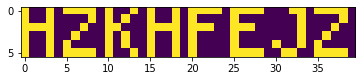

In [28]:
# Day 13: Part 2

data = get_lines(13)

split = data.index("")

grid = []

for i in range(split):
    p = get_as_ints(data[i].split(","))
    grid.append([p[0], p[1]])
    
folds = []

for i in range(split + 1, len(data)):
    folds.append("x" in data[i])
   
grid_size = [1311, 895]

for foldX in folds:
    size = grid_size[0] if foldX else grid_size[1]

    if foldX:
        grid_size[0] //= 2
    else:
        grid_size[1] //= 2
    
    new_grid = []
    for i in grid:
        if foldX and i[0] >= size // 2:
            i[0] = size - 1 - i[0]
        elif not foldX and i[1] >= size // 2:
            i[1] = size - 1 - i[1]
                
        if not i in new_grid:
            new_grid.append(i)

    grid = new_grid

display = np.zeros((6, 40))
for p in grid:
    display[p[1], p[0]] = 1

plt.imshow(display, vmin = 0, vmax = 1)     

In [74]:
# Day 14: Part 1
data = get_lines(14)

vals = {}

for i in range(2, len(data)):
    s = data[i].split(" -> ")
    vals[s[0]] = s[1]

string = data[0]
for i in range(10):
    new_string = string[0]
    for i in range(0, len(string) - 1):
        key = string[i: i+2]
        val = vals[key]
        
        new_string += val + key[1]
    string = new_string

chars = []
counts = []

for c in string:
    if c in chars:
        counts[chars.index(c)] += 1
    else:
        chars.append(c)
        counts.append(1)
        
print(np.array(counts)[np.argsort(counts)][len(counts) - 1] - np.array(counts)[np.argsort(counts)][0])

2712


In [81]:
# Day 14: Part 2
data = get_lines(14)

vals = {}
pairs = {}

for i in range(2, len(data)):
    s = data[i].split(" -> ")
    vals[s[0]] = s[1]
    pairs[s[0]] = 0

string = data[0]
        
for i in range(0, len(string) - 1):
    pairs[string[i: i + 2:]] += 1
          
for i in range(40):
    new_pairs = {}
    for pair in pairs.keys():
        new_pairs[pair] = 0
    
    for pair in pairs.keys():        
        val = vals[pair]
        new_pairs[pair[0] + val] += pairs[pair]
        new_pairs[val + pair[1]] += pairs[pair]
    pairs = new_pairs
    
chars = []
counts = []

for pair in pairs.keys():
    if pair[0] in chars:
        counts[chars.index(pair[0])] += pairs[pair]
    else:
        chars.append(pair[0])
        counts.append(pairs[pair])

counts[chars.index(string[::-1][0])] +=1
        
print(np.array(counts)[np.argsort(counts)][len(counts) - 1] - np.array(counts)[np.argsort(counts)][0])

8336623059567


In [156]:
# Day 15: Part 1
data = get_lines(15)

size = len(data)

grid = np.zeros((size, size))
i = 0
for line in data:
    for c in line:
        grid[i // size][i % size] = int(c)
        i += 1
        
path = [[0, 0, 0]]
explored = np.zeros((size, size))
explored[0, 0] = 1
min_path = None

neighbors = [[1, 0], [-1, 0], [0, 1], [0, -1]]

def search():
    global min_path, size
    while len(path):
        path.sort(key = lambda x: x[2])
        x, y, cost = path.pop(0)
        if min_path is None or cost < min_path:
            for direction in neighbors:
                new_pos = np.add([x, y], direction)
                if not -1 in new_pos and not size in new_pos:
                    if new_pos[0] == size - 1 and new_pos[1] ==  size - 1:
                        cost += grid[new_pos[0], new_pos[1]]
                        if min_path is None or cost < best:
                            min_path = cost
                            return
                    if not explored[new_pos[0], new_pos[1]]:
                        explored[new_pos[0], new_pos[1]] = 1
                        path.append((new_pos[0], new_pos[1], cost + grid[new_pos[0], new_pos[1]]))

search()
print(int(min_path))

390


In [157]:
# Day 15: Part 2
data = get_lines(15)

size = len(data) * 5

grid = np.zeros((size, size))
i = 0
for line in data:
    for c in line:
        grid[i // (size // 5)][i % (size // 5)] = int(c)
        i += 1
        
pts = [(pt // len(data), pt % len(data), grid[pt // len(data), pt % len(data)]) for pt in range(len(data) * len(data))]

for ox, oy in [(x // 5, x % 5) for x in range(1, 25)]:
    for x, y, val in pts:
        grid[x + ox * len(data), y + oy * len(data)] = (val - 1 + ox + oy) % 9 + 1

path = [[0, 0, 0]]
explored = np.zeros((size, size))
explored[0, 0] = 1
min_path = None

neighbors = [[1, 0], [-1, 0], [0, 1], [0, -1]]

def search():
    global min_path, size
    while len(path):
        path.sort(key = lambda x: x[2])
        x, y, cost = path.pop(0)
        if min_path is None or cost < min_path:
            for direction in neighbors:
                new_pos = np.add([x, y], direction)
                if not -1 in new_pos and not size in new_pos:
                    if new_pos[0] == size - 1 and new_pos[1] ==  size - 1:
                        cost += grid[new_pos[0], new_pos[1]]
                        if min_path is None or cost < best:
                            min_path = cost
                            return
                    if not explored[new_pos[0], new_pos[1]]:
                        explored[new_pos[0], new_pos[1]] = 1
                        path.append((new_pos[0], new_pos[1], cost + grid[new_pos[0], new_pos[1]]))

# search()
print(int(min_path))

2814


In [297]:
# Day 16: Part 1
data = get_lines(16)[0]

hex_to_bin = {
    "0": "0000",
    "1": "0001",
    "2": "0010",
    "3": "0011",
    "4": "0100",
    "5": "0101",
    "6": "0110",
    "7": "0111",
    "8": "1000",
    "9": "1001",
    "A": "1010",
    "B": "1011",
    "C": "1100",
    "D": "1101",
    "E": "1110",
    "F": "1111",
}

decoded = ""

for c in data:
    decoded += hex_to_bin[c]
    
version_sum = 0

def parse_packet(start):
    global version_sum
    
    value = None
    v = int(decoded[start: start + 3], 2)
    t = int(decoded[start + 3: start + 6], 2)

    version_sum += v
    
    if t == 4:
        start += 6
        value = 0
        while True:
            value *= 16
            value += int(decoded[start + 1: start + 5], 2)
            start += 5
            if decoded[start - 5] == "0":
                break
    else:
        i = int(decoded[start + 6], 2)
        l = int(decoded[start + 7: start + 7 + (15 if i == 0 else 11)], 2)
        
        start += 7
        start += 15 if i == 0 else 11
        
        if i == 0: # length of subpackets
            start_start = start
            while True:
                _, next_start = parse_packet(start)
                start = next_start
                
                assert next_start > i
                assert next_start - start_start <= l
                
                if next_start - start_start == l:
                    break
        else: # number of subpackets
            for _ in range(l):
                _, next_start = parse_packet(start)

                assert next_start > start
                start = next_start
    return (v, start)

parse_packet(0)
print(version_sum)
    

895


In [298]:
# Day 16: Part 1
data = get_lines(16)[0]

hex_to_bin = {
    "0": "0000",
    "1": "0001",
    "2": "0010",
    "3": "0011",
    "4": "0100",
    "5": "0101",
    "6": "0110",
    "7": "0111",
    "8": "1000",
    "9": "1001",
    "A": "1010",
    "B": "1011",
    "C": "1100",
    "D": "1101",
    "E": "1110",
    "F": "1111",
}

decoded = ""

for c in data:
    decoded += hex_to_bin[c]
    
version_sum = 0

def parse_packet(start):
    global version_sum
    
    value = None
    v = int(decoded[start: start + 3], 2)
    t = int(decoded[start + 3: start + 6], 2)

    version_sum += v
    
    if t == 4:
        start += 6
        value = 0
        while True:
            value *= 16
            value += int(decoded[start + 1: start + 5], 2)
            start += 5
            if decoded[start - 5] == "0":
                break
    else:
        i = int(decoded[start + 6], 2)
        l = int(decoded[start + 7: start + 7 + (15 if i == 0 else 11)], 2)
        
        start += 7
        start += 15 if i == 0 else 11
        
        values = []
        
        if i == 0: # length of subpackets
            start_start = start
            while True:
                _v, __v, next_start = parse_packet(start)
                values.append(__v)
                start = next_start
                
                assert next_start > i
                assert next_start - start_start <= l
                
                if next_start - start_start == l:
                    break
        else: # number of subpackets
            for _ in range(l):
                _v, __v, next_start = parse_packet(start)
                values.append(__v)
                assert next_start > start
                start = next_start
                
        if t == 0:
            value = np.sum(values)
        elif t == 1:
            value = 1
            for _v in values:
                value *= _v
        elif t == 2:
            value = values[np.argsort(values)[0]]
        elif t == 3: 
            value = values[np.argsort(values)[::-1][0]]
        elif t == 5:
            value = 1 if values[0] > values [1] else 0
        elif t == 6:
            value = 1 if values[0] < values [1] else 0
        elif t == 7:
            value = 1 if values[0] == values [1] else 0
        
    return (v, value, start)

print(parse_packet(0)[1])
    

1148595959144


In [531]:
# Day 17: Part 1
data = get_lines(17)[0]

start = [0, 0]

pos = data[13:]
# x min max, y min max
points = get_as_ints(re.findall("-?\\d+", pos))

max_y_vel = points[2] * -1 - 1

print(max_y_vel * (max_y_vel + 1) // 2)

12246


In [532]:
# Day 17: Part 2
data = get_lines(17)[0]

pos_data = data[13:]
# x min max, y min max
points = get_as_ints(re.findall("-?\\d+", pos_data))

x_vel_min = 0

while x_vel_min * (x_vel_min + 1) // 2 < points[0]:
    x_vel_min+=1
    
y_vel_max = points[2] * -1 - 1

x_vel_max = points[1]
y_vel_min = points[2]

total = 0

for x_vel in range(x_vel_min, x_vel_max + 1):
    for y_vel in range(y_vel_min, y_vel_max + 1):
        pos = [0, 0]
        
        x_vel_run = x_vel
        y_vel_run = y_vel
        
        while pos[0] <= points[1] and pos[1] >= points[2]:
            pos[0] += x_vel_run
            pos[1] += y_vel_run
            
            if x_vel_run > 0:
                x_vel_run -= 1
                
            y_vel_run -= 1
            
            if pos[0] <= points[1] and pos[1] >= points[2]:
                if pos[0] >= points[0] and pos[1] <= points[3]:
                    total += 1
                    break
print(total)
        

3528


In [520]:
# Day 18: Part 1
data = get_lines(18)

numbers = []

for line in data:
    index = 0
    array = []
    for char in line:
        if char == "[":
            index += 1
        elif char == "]":
            index -= 1
        elif char != ",":
            array.append([int(char), index])
            
    numbers.append(array)

def add(n1, n2):
    arr = n1 + n2
    for val in arr:
        val[1] += 1
    return reduce(arr)

def reduce(arr):
    ex = explode(arr)
    if ex != None:
        return reduce(ex)
    else:
        sp = split(arr)
        if sp != None:
            return reduce(sp)
        return arr
    
def explode(arr):
    for i in range(len(arr) - 1):
        if arr[i][1] >= 5 and arr[i + 1][1] == arr[i][1]:
            if i > 0:
                arr[i - 1][0] += arr[i][0]
            if i + 2 < len(arr):
                arr[i + 2][0] += arr[i + 1][0]
            del arr[i + 1]
            arr[i] = [0, arr[i][1] - 1]
            
            return arr
            
    return None

def split(arr):
    for i in range(len(arr)):
        if arr[i][0] >= 10:
            val = arr[i][0]
            arr[i] = [val // 2, arr[i][1] + 1]
            arr.insert(i + 1, [val - val // 2, arr[i][1]])
            return arr
    return None

def mag(arr):
    while len(arr) > 1:
        for i in range(len(arr) - 1):
            if arr[i][1] == arr[i + 1][1]:
                arr[i][0] *= 3
                arr[i][0] += 2 * arr[i + 1][0]
                arr[i][1] -= 1
                del arr[i + 1]
                break
    return arr[0][0]

total = add(numbers[0], numbers[1])

for i in range(2, len(numbers)):
    total = add(total, numbers[i])

print(mag(total))

3647


In [533]:
# Day 18: Part 2
data = get_lines(18)

numbers = []

for line in data:
    index = 0
    array = []
    for char in line:
        if char == "[":
            index += 1
        elif char == "]":
            index -= 1
        elif char != ",":
            array.append([int(char), index])
            
    numbers.append(array)

def add(n1, n2):
    arr = n1 + n2
    for val in arr:
        val[1] += 1
    return reduce(arr)

def reduce(arr):
    ex = explode(arr)
    if ex != None:
        return reduce(ex)
    else:
        sp = split(arr)
        if sp != None:
            return reduce(sp)
        return arr
    
def explode(arr):
    for i in range(len(arr) - 1):
        if arr[i][1] >= 5 and arr[i + 1][1] == arr[i][1]:
            if i > 0:
                arr[i - 1][0] += arr[i][0]
            if i + 2 < len(arr):
                arr[i + 2][0] += arr[i + 1][0]
            del arr[i + 1]
            arr[i] = [0, arr[i][1] - 1]
            
            return arr
            
    return None

def split(arr):
    for i in range(len(arr)):
        if arr[i][0] >= 10:
            val = arr[i][0]
            arr[i] = [val // 2, arr[i][1] + 1]
            arr.insert(i + 1, [val - val // 2, arr[i][1]])
            return arr
    return None

def mag(arr):
    while len(arr) > 1:
        for i in range(len(arr) - 1):
            if arr[i][1] == arr[i + 1][1]:
                arr[i][0] *= 3
                arr[i][0] += 2 * arr[i + 1][0]
                arr[i][1] -= 1
                del arr[i + 1]
                break
    return arr[0][0]

maximum = -1
for i in range(0, len(numbers)):
    for j in range(0, len(numbers)):
        if i == j:
            continue
        _mag = mag(add(eval(repr(numbers[i])), eval(repr(numbers[j]))))
        if _mag > maximum:
            maximum = _mag

print(maximum)

4600


In [980]:
# Day 19: Part 1/2 Data gathering
data = get_lines(19)

points = []
scanner_points = []
for i in range(1, len(data)):
    if "---" in data[i]:
        points.append(scanner_points)
        scanner_points = []
    elif "," in data[i]:
        scanner_points.append(np.array(re.findall("-?\\d+", data[i])).astype(np.int32))
points.append(scanner_points)
        
def rotations():
    vectors = [
        (1, 0, 0),
        (-1, 0, 0),
        (0, 1, 0),
        (0, -1, 0),
        (0, 0, 1),
        (0, 0, -1),
    ]
    vectors = list(map(np.array, vectors))
    rotations = []
    for vi in vectors:
        for vj in vectors:
            if vi.dot(vj) == 0:
                vk = np.cross(vi, vj)
                rotations.append(np.array([vi, vj, vk]))
    return rotations

rotations = list(rotations())

# x, y, z, rotation_index (0 - 24)
scanners = np.zeros((len(points), len(points), 4))
scanners[:, :, 3] = -1

def try_solve(i, j):
    scanner_i_points = points[i]
    scanner_j_points = points[j]
    
    for rot in range(len(rotations)):
        delta_counts = {}
        for start_i in scanner_i_points:
            deltas = start_i - scanner_j_points @ rotations[rot]
            for delta in deltas:
                if not str(delta) in delta_counts.keys():
                    delta_counts[str(delta)] = 1
                else: 
                    delta_counts[str(delta)] += 1

        for key in delta_counts.keys():
            if delta_counts[key] >= 12:
                delta = re.findall("-?\\d+", key)
                scanners[j][i] = [delta[0], delta[1], delta[2], rot]
                return

for i in range(len(scanners)):
    for j in range(len(scanners)):
        try_solve(i, j)

scanners = np.array(scanners)

In [976]:
# Day 19: Part 1 Half 2
pairs = [(0, 0)]

stack = [0]
completed = []
while len(stack) != 0:
    i = stack.pop()
    for j in range(len(scanners)):
        if j in completed or j in stack:
            continue
        if scanners[i,j,3] != -1 and not i == j:
            pairs.append((j, i))
            stack.insert(0, j)
    completed.append(i)
    
seen_points = set()

for i in range(len(scanners)):
    pair = None
    translated = points[i]
    
    while pair == None or pair[0] != 0:
        for p in pairs:
            if (pair == None and p[0] == i) or (pair != None and p[0] == pair[1]):
                pair = p
                break

        rotation = rotations[int(scanners[pair[0], pair[1], 3])]
        translated = translated @ rotation + scanners[pair[0], pair[1], 0:3]
        
    for point in translated:
        seen_points.add(str(point))

print(len(seen_points))

332


In [979]:
# Day 19: Part 2 Half 2

locations = []

for i in range(len(scanners)):
    pair = None
    translated = np.array([0,0,0])
    
    while pair == None or pair[0] != 0:
        for p in pairs:
            if (pair == None and p[0] == i) or (pair != None and p[0] == pair[1]):
                pair = p
                break

        rotation = rotations[int(scanners[pair[0], pair[1], 3])]
        translated = translated @ rotation + scanners[pair[0], pair[1], 0:3]
    locations.append(translated)

m = 0

for a in locations:
    for b in locations:
        s = a - b
        s = abs(s)
        s = s.sum()
        
        if s > m:
            m = s
    
print(int(m))

8507.0


In [810]:
# Day 20: Part 1
data = get_lines(20)

alg = data[0]

start_img = np.zeros((len(data) - 2, len(data[2])))

for i in range(2, len(data)):
    for j in range(len(data[i])):
        start_img[i - 2][j] = 1 if data[i][j] == "#" else 0

def get_value(i, j, arr, default):
    if i < 0 or i >= len(arr) or j < 0 or j >= len(arr[i]):
        return 1 - default if alg[0] == "#" else 0
    return arr[i, j]

def run_step(img, step):
    new_img = np.zeros((len(img) + 2, len(img) + 2))
    for x in range(len(new_img)):
        for y in range(len(new_img[x])):
            n = 0
            for i in range(3):
                for j in range(3):
                    n *= 2
                    n += get_value(x + i - 2, y + j - 2, img, step % 2)
            new_img[x, y] = 1 if alg[int(n)] == "#" else 0
    return new_img

print(int(run_step(run_step(start_img, 1), 2).sum()))

5846


In [981]:
# Day 20: Part 2
data = get_lines(20)

# data = """..#.#..#####.#.#.#.###.##.....###.##.#..###.####..#####..#....#..#..##..###..######.###...####..#..#####..##..#.#####...##.#.#..#.##..#.#......#.###.######.###.####...#.##.##..#..#..#####.....#.#....###..#.##......#.....#..#..#..##..#...##.######.####.####.#.#...#.......#..#.#.#...####.##.#......#..#...##.#.##..#...##.#.##..###.#......#.#.......#.#.#.####.###.##...#.....####.#..#..#.##.#....##..#.####....##...##..#...#......#.#.......#.......##..####..#...#.#.#...##..#.#..###..#####........#..####......#..#

# #..#.
# #....
# ##..#
# ..#..
# ..###""".split("\n")

alg = data[0]

start_img = np.zeros((len(data) - 2, len(data[2])))

for i in range(2, len(data)):
    for j in range(len(data[i])):
        start_img[i - 2][j] = 1 if data[i][j] == "#" else 0

def get_value(i, j, arr, default):
    if i < 0 or i >= len(arr) or j < 0 or j >= len(arr[i]):
        return 1 - default if alg[0] == "#" else 0
    return arr[i, j]

def run_step(img, step):
    new_img = np.zeros((len(img) + 2, len(img) + 2))
    for x in range(len(new_img)):
        for y in range(len(new_img[x])):
            n = 0
            for i in range(3):
                for j in range(3):
                    n *= 2
                    n += get_value(x + i - 2, y + j - 2, img, step % 2)
            new_img[x, y] = 1 if alg[int(n)] == "#" else 0
    return new_img

img = start_img

for i in range(0, 50):
    img = run_step(img, i + 1)
print(int(img.sum()))

21149


In [1010]:
# Day 21: Part 1
data = get_lines(21)

dice_roll = 0

def get_roll():
    global dice_roll
    roll = dice_roll + 1
    dice_roll += 1
    dice_roll %= 100
    return roll
    
players = [[int(data[0][::-1][0]),0],[int(data[1][::-1][0]),0]]

def roll_and_add(player):
    player[0] += get_roll() + get_roll() + get_roll() - 1
    player[0] %= 10
    player[0] += 1
    player[1] += player[0]

turn = 0
while players[0][1] < 1000 and players[1][1] < 1000:
    player = turn % 2
    roll_and_add(players[player])
    turn += 1

print(turn * 3 * (players[0][1] if players[0][1] < players[1][1] else players[1][1]))

929625


In [1053]:
# Day 21: Part 2
data = get_lines(21)

players = [[int(data[0][::-1][0]),0],[int(data[1][::-1][0]),0]]

already_seen = {}

def find_wins(players, turn, roll = 0):
    turn_str = ((tuple(players[0]), tuple(players[1])), turn, roll)
    if turn_str in already_seen.keys():
        return already_seen[turn_str]
    
    player = turn % 2
    new_players = [[players[0][0], players[0][1]], [players[1][0], players[1][1]]]
    if not roll == 0:
        new_players[player][0] += roll - 1
        new_players[player][0] %= 10
        new_players[player][0] += 1
        new_players[player][1] += new_players[player][0]
        
        ret = None
        if new_players[0][1] >= 21:
            ret = (1, 0)
        elif new_players[1][1] >= 21:
            ret = (0, 1)
            
        if ret != None:
            already_seen[turn_str] = ret
            return ret
        
    one_wins = 0
    two_wins = 0
    for a in range(1, 4):
        for b in range(1, 4):
            for c in range(1, 4):
                o, t = find_wins(new_players, turn + 1, a + b + c)
                one_wins += o
                two_wins += t
                
    ret = (one_wins, two_wins)
    already_seen[turn_str] = ret
    return ret

one, two = find_wins(players, -1)
print(one if one > two else two)

175731756652760


In [1119]:
# Day 22: Part 1
data = get_lines(22)

data = """on x=-5..47,y=-31..22,z=-19..33
on x=-44..5,y=-27..21,z=-14..35
on x=-49..-1,y=-11..42,z=-10..38
on x=-20..34,y=-40..6,z=-44..1
off x=26..39,y=40..50,z=-2..11
on x=-41..5,y=-41..6,z=-36..8
off x=-43..-33,y=-45..-28,z=7..25
on x=-33..15,y=-32..19,z=-34..11
off x=35..47,y=-46..-34,z=-11..5
on x=-14..36,y=-6..44,z=-16..29
on x=-57795..-6158,y=29564..72030,z=20435..90618
on x=36731..105352,y=-21140..28532,z=16094..90401
on x=30999..107136,y=-53464..15513,z=8553..71215
on x=13528..83982,y=-99403..-27377,z=-24141..23996
on x=-72682..-12347,y=18159..111354,z=7391..80950
on x=-1060..80757,y=-65301..-20884,z=-103788..-16709
on x=-83015..-9461,y=-72160..-8347,z=-81239..-26856
on x=-52752..22273,y=-49450..9096,z=54442..119054
on x=-29982..40483,y=-108474..-28371,z=-24328..38471
on x=-4958..62750,y=40422..118853,z=-7672..65583
on x=55694..108686,y=-43367..46958,z=-26781..48729
on x=-98497..-18186,y=-63569..3412,z=1232..88485
on x=-726..56291,y=-62629..13224,z=18033..85226
on x=-110886..-34664,y=-81338..-8658,z=8914..63723
on x=-55829..24974,y=-16897..54165,z=-121762..-28058
on x=-65152..-11147,y=22489..91432,z=-58782..1780
on x=-120100..-32970,y=-46592..27473,z=-11695..61039
on x=-18631..37533,y=-124565..-50804,z=-35667..28308
on x=-57817..18248,y=49321..117703,z=5745..55881
on x=14781..98692,y=-1341..70827,z=15753..70151
on x=-34419..55919,y=-19626..40991,z=39015..114138
on x=-60785..11593,y=-56135..2999,z=-95368..-26915
on x=-32178..58085,y=17647..101866,z=-91405..-8878
on x=-53655..12091,y=50097..105568,z=-75335..-4862
on x=-111166..-40997,y=-71714..2688,z=5609..50954
on x=-16602..70118,y=-98693..-44401,z=5197..76897
on x=16383..101554,y=4615..83635,z=-44907..18747
off x=-95822..-15171,y=-19987..48940,z=10804..104439
on x=-89813..-14614,y=16069..88491,z=-3297..45228
on x=41075..99376,y=-20427..49978,z=-52012..13762
on x=-21330..50085,y=-17944..62733,z=-112280..-30197
on x=-16478..35915,y=36008..118594,z=-7885..47086
off x=-98156..-27851,y=-49952..43171,z=-99005..-8456
off x=2032..69770,y=-71013..4824,z=7471..94418
on x=43670..120875,y=-42068..12382,z=-24787..38892
off x=37514..111226,y=-45862..25743,z=-16714..54663
off x=25699..97951,y=-30668..59918,z=-15349..69697
off x=-44271..17935,y=-9516..60759,z=49131..112598
on x=-61695..-5813,y=40978..94975,z=8655..80240
off x=-101086..-9439,y=-7088..67543,z=33935..83858
off x=18020..114017,y=-48931..32606,z=21474..89843
off x=-77139..10506,y=-89994..-18797,z=-80..59318
off x=8476..79288,y=-75520..11602,z=-96624..-24783
on x=-47488..-1262,y=24338..100707,z=16292..72967
off x=-84341..13987,y=2429..92914,z=-90671..-1318
off x=-37810..49457,y=-71013..-7894,z=-105357..-13188
off x=-27365..46395,y=31009..98017,z=15428..76570
off x=-70369..-16548,y=22648..78696,z=-1892..86821
on x=-53470..21291,y=-120233..-33476,z=-44150..38147
off x=-93533..-4276,y=-16170..68771,z=-104985..-24507""".split("\n")

new_data = []

for line in data:
    new_data.append(('f' not in line, get_as_ints(re.findall("-?\\d+", line))))
    bounds = new_data[::-1][0][1]
    bounds[1] += 1
    bounds[3] += 1
    bounds[5] += 1
    
grid = np.zeros((101, 101, 101))
for i in range(20):
    on = 1 if new_data[i][0] else 0
    vs = new_data[i][1]
    grid[vs[0] + 50: vs[1] + 50:, vs[2] + 50: vs[3] + 50:, vs[4] + 50: vs[5] + 50:] = on

print(int(grid.sum()))



def intersects(range0, range1):
    return range0[0] <= range1[0] <= range0[1] or range0[0] <= range1[1] <= range0[1] or range1[0] <= range0[0] <= range1[1] or range1[0] <= range0[1] <= range0[1]

# new bounds for this, new generic bounds, union
def union_of(bounds_a, bounds_b):
    if intersects(bounds_a[0:2], bounds_b[0:2]) and intersects(bounds_a[2:4], bounds_b[2:4]) and intersects(bounds_a[4:6], bounds_b[4:6]):
            print("intersects")
            return ([], [], [])
    else:
        print("doesnt intersect")
        return ([bounds_a], [bounds_b], [])
    
on_points = 0
completed = 0
unions = []
for on, bounds in new_data:
    if len(unions) == 0 and on == 1:
        unions.append(bounds)
    
    my_bounds = [bounds]
    ui = 0
    new_unions_step = []
    for union in unions:
        new_my_bounds = []
        for my_bound in my_bounds:
            new_bounds, new_unions, new_union = union_of(my_bound, union)
            new_unions_step.append(new_unions)
            if on == 1 and len(new_union) == 0:
                new_my_bounds.append(new_union)
        my_bounds = new_my_bounds
    
    for new_union_step in new_unions_step:
        unions.append(new_union_step)
    print(unions)
    completed += 1
    if completed == 1:
        break
print(on_points)

474140
intersects
[[-5, 48, -31, 23, -19, 34], []]
0
